In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Audio
import ipywidgets as widgets

# Constants
SAMPLE_RATE = 44100  # Sample rate in Hz
DURATION = 2  # Duration in seconds

# Swaras with corresponding Western notes and frequency ratios
swaras = {
    'Sa': ('C', 1),
    'Ri': ('D', 9/8),
    'Ga': ('E', 5/4),
    'Ma': ('F', 4/3),
    'Pa': ('G', 3/2),
    'Dha': ('A', 5/3),
    'Ni': ('B', 15/8)
}

def generate_sine_wave(freq=440.0, amplitude=0.5, duration=DURATION, sample_rate=SAMPLE_RATE):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    return t, amplitude * np.sin(2 * np.pi * freq * t)

# 1. Basic Sine Wave
print("1. Basic Sine Wave")
print("\nA sine wave is a mathematical curve that describes a smooth periodic oscillation. It is fundamental to many areas of science and engineering. In music, it represents a pure tone.")
print("Let's visualize a basic sine wave and hear how it sounds.")

def plot_sine_wave(freq=440.0, amplitude=0.5):
    plt.figure(figsize=(10, 4))
    t, y = generate_sine_wave(freq, amplitude)
    plt.plot(t * 1e6, y, label=f'Sine Wave: {freq}Hz')  # Convert time to microseconds
    plt.title('Basic Sine Wave')
    plt.xlabel('Time (μs)')
    plt.xlim(0, 10000)  # Limit to 10000 microseconds
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Play audio
    display(Audio(y, rate=SAMPLE_RATE))

# Display widgets and plots for basic sine wave
freq_slider = widgets.FloatSlider(min=100, max=1000, step=1, value=440, description='Frequency (Hz)')
amplitude_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Amplitude')
widgets.interactive(plot_sine_wave, freq=freq_slider, amplitude=amplitude_slider)







1. Basic Sine Wave

A sine wave is a mathematical curve that describes a smooth periodic oscillation. It is fundamental to many areas of science and engineering. In music, it represents a pure tone.
Let's visualize a basic sine wave and hear how it sounds.


interactive(children=(FloatSlider(value=440.0, description='Frequency (Hz)', max=1000.0, min=100.0, step=1.0),…

In [2]:

# 2. Music Attributes: Amplitude & Pitch
print("\n2. Music Attributes: Amplitude & Pitch")
print("\nAmplitude determines the loudness of the sound, while pitch (related to frequency) determines how high or low the sound is.")
print("By adjusting these attributes, we can change the sound's characteristics. Let's experiment:")

def plot_amplitude_pitch_variation(freq=440.0, amplitude=0.5):
    plt.figure(figsize=(10, 4))
    t, y = generate_sine_wave(freq, amplitude)
    plt.plot(t * 1e6, y, label=f'Wave: {freq}Hz, Amplitude: {amplitude}')  # Convert time to microseconds
    plt.title('Amplitude & Pitch Variation')
    plt.xlabel('Time (μs)')
    plt.xlim(0, 10000)  # Limit to 10000 microseconds
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Play audio
    display(Audio(y, rate=SAMPLE_RATE))

widgets.interactive(plot_amplitude_pitch_variation, freq=freq_slider, amplitude=amplitude_slider)




2. Music Attributes: Amplitude & Pitch

Amplitude determines the loudness of the sound, while pitch (related to frequency) determines how high or low the sound is.
By adjusting these attributes, we can change the sound's characteristics. Let's experiment:


interactive(children=(FloatSlider(value=440.0, description='Frequency (Hz)', max=1000.0, min=100.0, step=1.0),…

In [3]:
# 3. Swaras
print("\n3. Swaras")
print("\nSwaras are the musical notes in Indian classical music. There are seven basic swaras, and they can be thought of as the building blocks for melodies and ragas.")
print("Let's visualize and listen to each Swara:")

def plot_swaras(base_freq=240.0):
    plt.figure(figsize=(15, 10))
    for idx, (swara, (note, ratio)) in enumerate(swaras.items()):
        t, y = generate_sine_wave(base_freq * ratio)
        plt.subplot(3, 3, idx + 1)
        plt.plot(t * 1e6, y, label=f'{swara} ({note})', color=np.random.rand(3,))  # Convert time to microseconds
        plt.title(f'{swara} ({note})')
        plt.xlabel('Time (μs)')
        plt.xlim(0, 10000)  # Limit to 10000 microseconds
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.tight_layout()
        display(Audio(y, rate=SAMPLE_RATE))
    plt.show()

base_freq_slider = widgets.FloatSlider(min=100, max=500, step=1, value=240, description='Base Frequency (Hz)')
widgets.interactive(plot_swaras, base_freq=base_freq_slider)


3. Swaras

Swaras are the musical notes in Indian classical music. There are seven basic swaras, and they can be thought of as the building blocks for melodies and ragas.
Let's visualize and listen to each Swara:


interactive(children=(FloatSlider(value=240.0, description='Base Frequency (Hz)', max=500.0, min=100.0, step=1…

In [4]:

# 4. Ragas
print("\n4. Ragas")
print("\nRagas are melodic patterns in Indian classical music. Each raga evokes specific emotions and is used as a basis for improvisation. A raga is defined by its unique sequence of Swaras.")
print("Let's explore a few ragas:")

# Some popular ragas as examples
ragas = {
    'Bhoopali': ['Sa', 'Ri', 'Ga', 'Pa', 'Dha'],
    'Durga': ['Sa', 'Ri', 'Ma', 'Pa', 'Dha']
}

def generate_raga_wave(raga, base_freq=240.0, amplitude=0.5):
    y_raga = np.zeros(int(SAMPLE_RATE * DURATION))
    for swara in raga:
        _, y = generate_sine_wave(base_freq * swaras[swara][1], amplitude)
        y_raga += y
    return y_raga

def plot_raga(raga_name='Bhoopali', base_freq=240.0, amplitude=0.5, tonic=1.0):
    plt.figure(figsize=(10, 4))
    y_raga = generate_raga_wave(ragas[raga_name], base_freq * tonic, amplitude)
    t = np.linspace(0, DURATION, int(SAMPLE_RATE * DURATION), endpoint=False)
    plt.plot(t * 1e6, y_raga)  # Convert time to microseconds
    plt.title(f'Raga: {raga_name}')
    plt.xlabel('Time (μs)')
    plt.xlim(0, 10000)  # Limit to 10000 microseconds
    plt.ylabel('Amplitude')

    # Annotating the Swaras used in the raga
    for swara in ragas[raga_name]:
        plt.annotate(swara, xy=(2000, amplitude * np.sin(2 * np.pi * base_freq * swaras[swara][1] * 2000/SAMPLE_RATE)))

    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Play audio
    display(Audio(y_raga, rate=SAMPLE_RATE))

# Interactive widgets for raga visualization
raga_dropdown = widgets.Dropdown(options=ragas.keys(), description='Raga')
tonic_slider = widgets.FloatSlider(min=0.8, max=1.2, step=0.01, value=1.0, description='Tonic Adjustment')

widgets.interactive(plot_raga, raga_name=raga_dropdown, base_freq=base_freq_slider, amplitude=amplitude_slider, tonic=tonic_slider)



4. Ragas

Ragas are melodic patterns in Indian classical music. Each raga evokes specific emotions and is used as a basis for improvisation. A raga is defined by its unique sequence of Swaras.
Let's explore a few ragas:


interactive(children=(Dropdown(description='Raga', options=('Bhoopali', 'Durga'), value='Bhoopali'), FloatSlid…

In [5]:


# 5. Interactive Exploration
print("\n5. Interactive Exploration")
print("\nNow, create your own ragas. Select sequences of Swaras, visualize, and hear them. This allows you to experiment and understand the essence of raga formation.")

def custom_raga(selected_swaras):
    plt.figure(figsize=(10, 4))
    y_raga = generate_raga_wave(selected_swaras)
    t = np.linspace(0, DURATION, int(SAMPLE_RATE * DURATION), endpoint=False)
    plt.plot(t * 1e6, y_raga)  # Convert time to microseconds
    plt.title(f'Custom Raga: {"-".join(selected_swaras)}')
    plt.xlabel('Time (μs)')
    plt.xlim(0, 10000)  # Limit to 10000 microseconds
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Play audio
    display(Audio(y_raga, rate=SAMPLE_RATE))

# Multi-select dropdown for Swaras for custom raga creation
swara_multiselect = widgets.SelectMultiple(
    options=swaras.keys(),
    description='Swaras',
    disabled=False
)

widgets.interactive(custom_raga, selected_swaras=swara_multiselect)



5. Interactive Exploration

Now, create your own ragas. Select sequences of Swaras, visualize, and hear them. This allows you to experiment and understand the essence of raga formation.


interactive(children=(SelectMultiple(description='Swaras', options=('Sa', 'Ri', 'Ga', 'Ma', 'Pa', 'Dha', 'Ni')…

In [11]:


# 6. Taal (Rhythm)
print("\n5. Taal (Rhythm)")
print("\nThe rhythm or 'Taal' is an essential part of Indian music. It represents the beat structure and complements the melody (raga).")
print("Let's explore a few common Taals:")

# Basic rhythm patterns (for demonstration purposes)
taals = {
    'Dadra': [1, 0, 1, 0, 1, 0],  # 6 beats
    'Keherva': [1, 0, 1, 0, 1, 0, 1, 0]  # 8 beats
}

def generate_taal_wave(taal_pattern, freq=1.0, amplitude=1.0):
    samples_per_beat = SAMPLE_RATE / freq
    y_taal = np.array([])
    for beat in taal_pattern:
        if beat:
            # For simplicity, using a sine wave for the beat
            _, beat_wave = generate_sine_wave(440, amplitude, 1/freq, SAMPLE_RATE)
        else:
            beat_wave = np.zeros(int(samples_per_beat))
        y_taal = np.concatenate((y_taal, beat_wave))
    return y_taal[:int(SAMPLE_RATE * DURATION)]

def plot_taal(taal_name='Dadra', freq=1.0, amplitude=1.0):
    plt.figure(figsize=(10, 4))
    y_taal = generate_taal_wave(taals[taal_name], freq, amplitude)
    t = np.linspace(0, DURATION, int(SAMPLE_RATE * DURATION), endpoint=False)
    plt.plot(t*1e6, y_taal)
    plt.title(f'Taal: {taal_name}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Play audio
    display(Audio(y_taal, rate=SAMPLE_RATE))

# Interactive widgets for Taal visualization
taal_dropdown = widgets.Dropdown(options=taals.keys(), description='Taal')
freq_slider_taal = widgets.FloatSlider(min=0.5, max=3.0, step=0.1, value=1.0, description='Beat Frequency')
amplitude_slider_taal = widgets.FloatSlider(min=0.1, max=1.0, step=0.1, value=1.0, description='Beat Amplitude')

widgets.interactive(plot_taal, taal_name=taal_dropdown, freq=freq_slider_taal, amplitude=amplitude_slider_taal)



5. Taal (Rhythm)

The rhythm or 'Taal' is an essential part of Indian music. It represents the beat structure and complements the melody (raga).
Let's explore a few common Taals:


interactive(children=(Dropdown(description='Taal', options=('Dadra', 'Keherva'), value='Dadra'), FloatSlider(v…

In [12]:
# ... [Previous Raga and Taal sections continue from here]

# 6. Combining Melody (Ragas) and Rhythm (Taal)
print("\n6. Combining Melody (Ragas) and Rhythm (Taal)")
print("\nMusic comes alive when melody (Raga) and rhythm (Taal) are combined. Let's experience this combination:")

def combine_raga_taal(raga_name='Bhoopali', base_freq=240.0, amplitude=0.5, tonic=1.0, taal_name='Dadra', freq=1.0):
    # Generate the Raga and Taal waveforms
    y_raga = generate_raga_wave(ragas[raga_name], base_freq * tonic, amplitude)
    y_taal = generate_taal_wave(taals[taal_name], freq, amplitude)

    # For simplicity, we'll just multiply the two signals to combine them.
    # In a real-world scenario, a more complex mixing would be used.
    combined_wave = y_raga[:len(y_taal)] * y_taal

    plt.figure(figsize=(10, 4))
    t = np.linspace(0, DURATION, int(SAMPLE_RATE * DURATION), endpoint=False)
    plt.plot(t, combined_wave)
    plt.title(f'Raga: {raga_name} with Taal: {taal_name}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Play audio
    display(Audio(combined_wave, rate=SAMPLE_RATE))

# Interactive widgets for combining Raga and Taal
widgets.interactive(combine_raga_taal,
                    raga_name=raga_dropdown, base_freq=base_freq_slider, amplitude=amplitude_slider, tonic=tonic_slider,
                    taal_name=taal_dropdown, freq=freq_slider_taal)

# ... [Continuation for Alankar, DSP Effects, Music Synthesis, Decomposition, and Final Exploration]



6. Combining Melody (Ragas) and Rhythm (Taal)

Music comes alive when melody (Raga) and rhythm (Taal) are combined. Let's experience this combination:


interactive(children=(Dropdown(description='Raga', options=('Bhoopali', 'Durga'), value='Bhoopali'), FloatSlid…

In [13]:
# ... [Previous Raga, Taal, and Combining sections continue from here]

# 7. Alankar (Musical Phrases)
print("\n7. Alankar (Musical Phrases)")
print("\nAlankars are sequences or patterns of Swaras used as musical exercises. Let's explore a few basic Alankars:")

# Basic Alankars for demonstration
alankars = {
    'Sarali Varisai 1': ['Sa', 'Ri', 'Ga', 'Ri', 'Sa'],
    'Sarali Varisai 2': ['Sa', 'Ga', 'Ri', 'Ga', 'Sa']
}

def generate_alankar_wave(alankar, base_freq=240.0, amplitude=0.5):
    y_alankar = np.zeros(int(SAMPLE_RATE * DURATION))
    for swara in alankar:
        _, y = generate_sine_wave(base_freq * swaras[swara][1], amplitude)
        y_alankar += y
    return y_alankar

def plot_alankar(alankar_name='Sarali Varisai 1', base_freq=240.0, amplitude=0.5, tonic=1.0):
    plt.figure(figsize=(10, 4))
    y_alankar = generate_alankar_wave(alankars[alankar_name], base_freq * tonic, amplitude)
    t = np.linspace(0, DURATION, int(SAMPLE_RATE * DURATION), endpoint=False)
    plt.plot(t, y_alankar)
    plt.title(f'Alankar: {alankar_name}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Play audio
    display(Audio(y_alankar, rate=SAMPLE_RATE))

# Interactive widgets for Alankar visualization
alankar_dropdown = widgets.Dropdown(options=alankars.keys(), description='Alankar')
widgets.interactive(plot_alankar,
                    alankar_name=alankar_dropdown, base_freq=base_freq_slider, amplitude=amplitude_slider, tonic=tonic_slider)

# ... [Continuation for DSP Effects, Music Synthesis, Decomposition, and Final Exploration]



7. Alankar (Musical Phrases)

Alankars are sequences or patterns of Swaras used as musical exercises. Let's explore a few basic Alankars:


interactive(children=(Dropdown(description='Alankar', options=('Sarali Varisai 1', 'Sarali Varisai 2'), value=…

In [14]:
# ... [Previous Raga, Taal, Combining, and Alankar sections continue from here]

# 8. Digital Signal Processing Effects
print("\n8. DSP Effects")
print("\nUsing Digital Signal Processing, we can apply various effects to audio. Let's explore a simple reverb effect on our generated ragas:")

def apply_reverb(signal, decay=0.5):
    """Apply a simple reverb effect using convolution with an exponential decay."""
    impulse_response = np.zeros(len(signal))
    impulse_response[::5000] = 1
    impulse_response = impulse_response * np.exp(-decay * np.arange(len(signal)))
    return np.convolve(signal, impulse_response, mode='same')

def plot_raga_with_effects(raga_name='Bhoopali', base_freq=240.0, amplitude=0.5, tonic=1.0, decay=0.5):
    y_raga = generate_raga_wave(ragas[raga_name], base_freq * tonic, amplitude)
    y_with_effect = apply_reverb(y_raga, decay)

    plt.figure(figsize=(10, 4))
    t = np.linspace(0, DURATION, int(SAMPLE_RATE * DURATION), endpoint=False)
    plt.plot(t, y_with_effect)
    plt.title(f'Raga: {raga_name} with Reverb Effect')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Play audio
    display(Audio(y_with_effect, rate=SAMPLE_RATE))

# Interactive widgets for Raga visualization with effects
decay_slider = widgets.FloatSlider(min=0.1, max=1.0, step=0.1, value=0.5, description='Reverb Decay')
widgets.interactive(plot_raga_with_effects,
                    raga_name=raga_dropdown, base_freq=base_freq_slider, amplitude=amplitude_slider, tonic=tonic_slider, decay=decay_slider)

# ... [Continuation for Music Synthesis, Decomposition, and Final Exploration]



8. DSP Effects

Using Digital Signal Processing, we can apply various effects to audio. Let's explore a simple reverb effect on our generated ragas:


interactive(children=(Dropdown(description='Raga', index=1, options=('Bhoopali', 'Durga'), value='Durga'), Flo…

In [16]:
# ... [Previous sections continue from here]

# 10. Advanced Music Synthesis
print("\n10. Advanced Music Synthesis")
print("\nCrafting sounds using harmonics, ADSR envelopes, and creating a basic melody.")

def generate_complex_tone(freq, harmonics_weights, duration=1.0):
    t = np.linspace(0, duration, int(SAMPLE_RATE * duration), endpoint=False)
    y = np.zeros_like(t)
    for i, weight in enumerate(harmonics_weights, 1):
        y += weight * np.sin(2 * np.pi * i * freq * t)
    return t, y

def apply_ADSR_envelope(signal, attack=0.1, decay=0.1, sustain=0.7, release=0.1, sustain_level=0.5):
    total_samples = len(signal)
    attack_samples = int(attack * total_samples)
    decay_samples = int(decay * total_samples)
    sustain_samples = int(sustain * total_samples)
    release_samples = int(release * total_samples)

    # Construct ADSR envelope
    envelope = np.concatenate([
        np.linspace(0, 1, attack_samples),
        np.linspace(1, sustain_level, decay_samples),
        np.ones(sustain_samples) * sustain_level,
        np.linspace(sustain_level, 0, release_samples)
    ])
    envelope = np.resize(envelope, total_samples)
    return signal * envelope

def plot_synthesized_music(freq=440.0, amplitude=0.5):
    # Create a complex tone with harmonics
    harmonics_weights = [1, 0.6, 0.3, 0.1, 0.05]
    t, y = generate_complex_tone(freq, harmonics_weights, 2)

    # Apply ADSR envelope
    y = apply_ADSR_envelope(y, 0.1, 0.1, 0.6, 0.2, 0.7)

    # Create a simple melody by changing frequencies
    notes = [freq, freq*1.25, freq*1.5, freq*1.75]  # Simple ratio for demonstration
    melody = np.array([])
    for note in notes:
        _, y_note = generate_complex_tone(note, harmonics_weights, 0.5)
        y_note = apply_ADSR_envelope(y_note, 0.1, 0.1, 0.3, 0.1, 0.7)
        melody = np.concatenate((melody, y_note))

    plt.figure(figsize=(10, 4))
    plt.plot(np.linspace(0, len(melody)/SAMPLE_RATE, len(melody)), melody)
    plt.title(f'Synthesized Melody starting at {freq} Hz')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Play audio
    display(Audio(melody, rate=SAMPLE_RATE))

# Interactive widgets for Advanced Synthesis visualization
widgets.interactive(plot_synthesized_music,
                    freq=freq_slider_synth, amplitude=amplitude_slider)

# ... [Continuation for Decomposition and Final Exploration]



10. Advanced Music Synthesis

Crafting sounds using harmonics, ADSR envelopes, and creating a basic melody.


interactive(children=(FloatSlider(value=100.0, description='Frequency', max=1000.0, min=100.0, step=10.0), Flo…

In [34]:
# ... [Previous sections continue from here]

# 11. Crafting a Catchy Melody
print("\n11. Crafting a Catchy Melody")
print("\nUsing our understanding of Swaras, rhythm, and harmonics, let's create a simple yet catchy melody.")

def generate_melody(base_freq=240.0, amplitude=0.5):
    # Sequence based on the major scale
    scale_sequence = ['Sa', 'Ri', 'Ga', 'Ma', 'Pa', 'Dha', 'Ni', 'Sa']

    # Duration for each note
    note_durations = [0.4, 0.4, 0.4, 0.4, 0.6, 0.4, 0.4, 0.6]

    melody = np.array([])
    for swara, duration in zip(scale_sequence, note_durations):
        _, y_note = generate_complex_tone(base_freq * swaras[swara][1], [1, 0.6, 0.3, 0.1, 0.05], duration)
        y_note = apply_ADSR_envelope(y_note, 0.1, 0.1, 0.6, 0.2, 0.7)
        melody = np.concatenate((melody, y_note))

    return melody

def plot_catchy_melody(base_freq=240.0, amplitude=0.5):
    melody = generate_melody(base_freq, amplitude)

    plt.figure(figsize=(10, 4))
    plt.plot(np.linspace(0, len(melody)/SAMPLE_RATE, len(melody)), melody)
    plt.title(f'Catchy Melody starting at {base_freq} Hz')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Play audio
    display(Audio(melody, rate=SAMPLE_RATE))

# Interactive widgets for Melody visualization
widgets.interactive(plot_catchy_melody,
                    base_freq=base_freq_slider, amplitude=amplitude_slider)

# ... [Continuation for further exploration]



11. Crafting a Catchy Melody

Using our understanding of Swaras, rhythm, and harmonics, let's create a simple yet catchy melody.


interactive(children=(FloatSlider(value=161.0, description='Base Frequency (Hz)', max=500.0, min=100.0, step=1…

ValueError: ignored

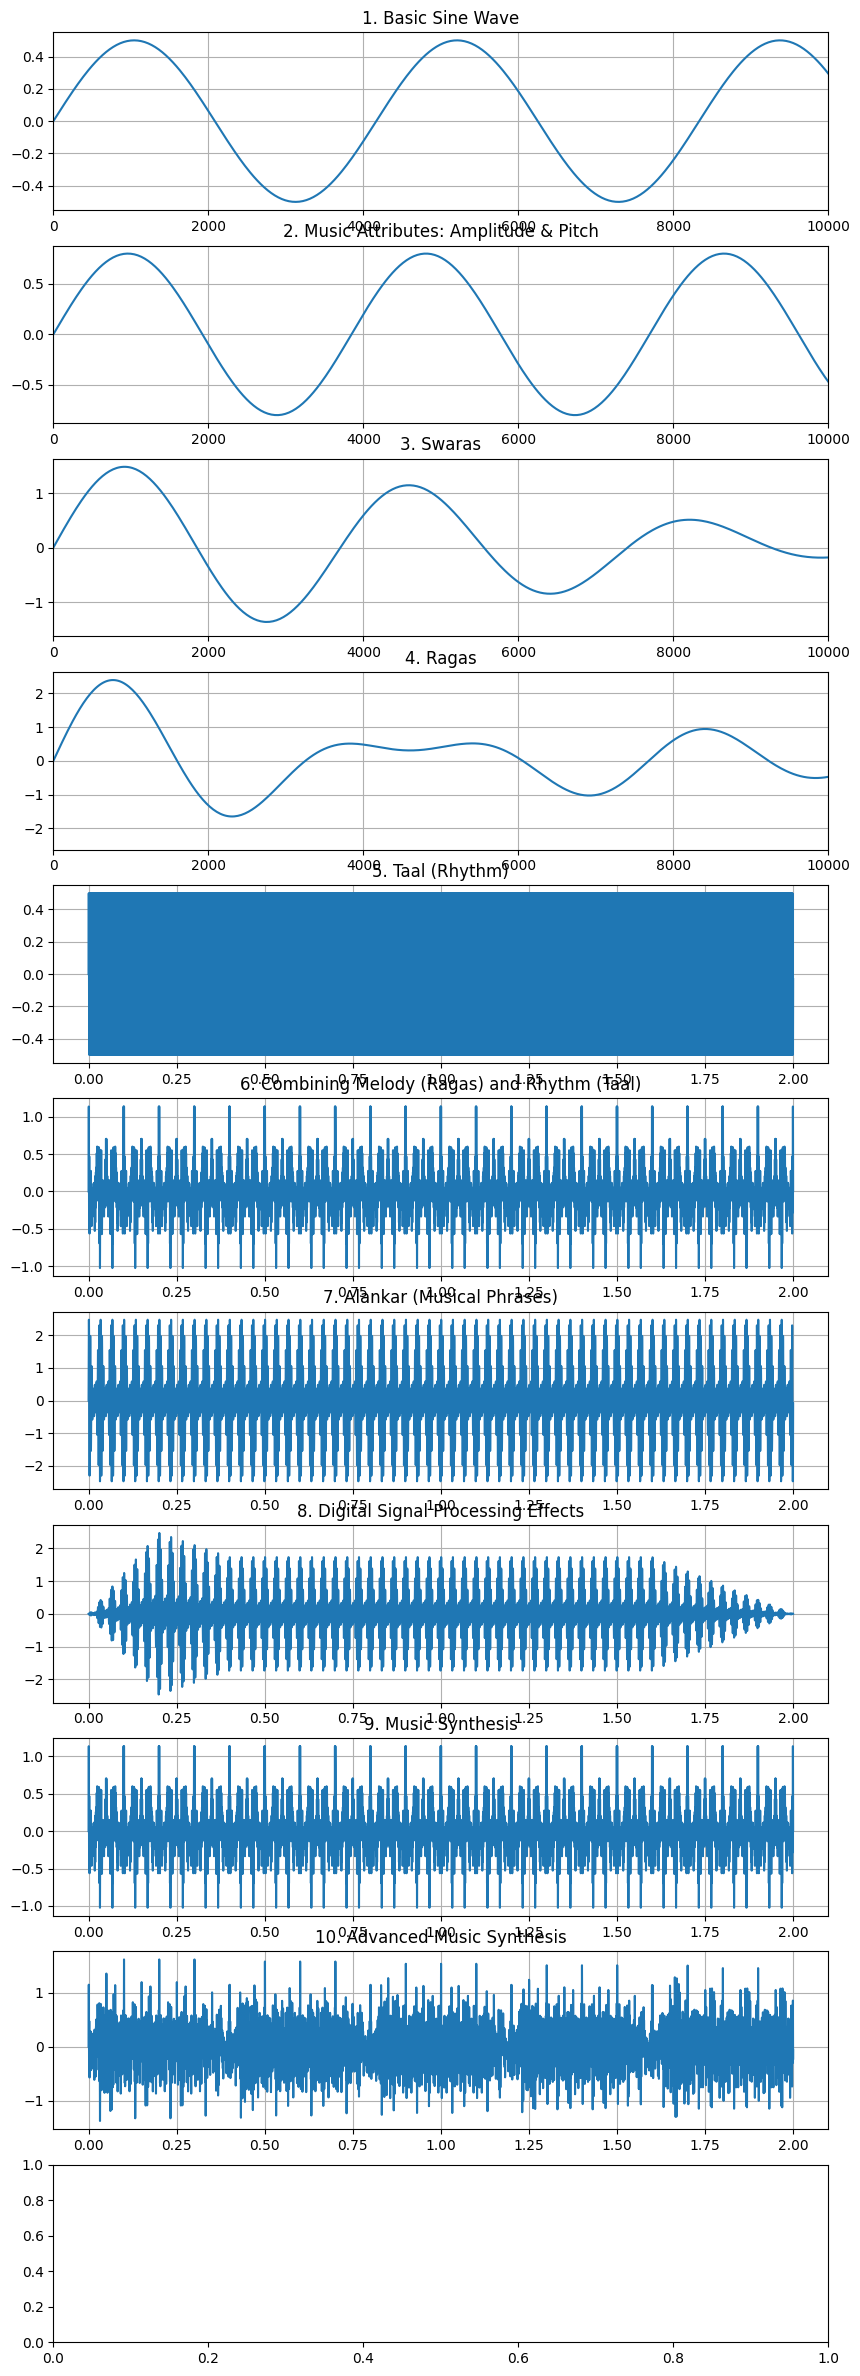

In [35]:
# ... [Previous setup and functions continue from here]

fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(10, 30), sharex=False)

# Step 1: Basic Sine Wave
t, y = generate_sine_wave(240, 0.5, 2)
axes[0].plot(t * 1e6, y)  # Convert time to microseconds
axes[0].set_title('1. Basic Sine Wave')
axes[0].set_xlim(0, 10000)
axes[0].grid(True)

# Step 2: Music Attributes: Amplitude & Pitch
# (Using a sine wave of different amplitude and frequency as an example)
t, y = generate_sine_wave(260, 0.8, 2)
axes[1].plot(t * 1e6, y)  # Convert time to microseconds
axes[1].set_title('2. Music Attributes: Amplitude & Pitch')
axes[1].set_xlim(0, 10000)
axes[1].grid(True)

# Step 3: Swaras
y = generate_raga_wave(['Sa', 'Ri', 'Ga'], 240, 0.5)
axes[2].plot(t * 1e6, y)  # Convert time to microseconds
axes[2].set_title('3. Swaras')
axes[2].set_xlim(0, 10000)
axes[2].grid(True)

# Step 4: Ragas
y = generate_raga_wave(['Sa', 'Ri', 'Ga', 'Pa', 'Dha'], 240, 0.5)
axes[3].plot(t * 1e6, y)  # Convert time to microseconds
axes[3].set_title('4. Ragas')
axes[3].set_xlim(0, 10000)
axes[3].grid(True)

# Steps 5-11 will not have a restricted time range

# Step 5: Taal (Rhythm)
y_taal = generate_taal_wave('Dadra', 1, 0.5)
axes[4].plot(t[:len(y_taal)], y_taal)
axes[4].set_title('5. Taal (Rhythm)')
axes[4].grid(True)

# Step 6: Combining Melody (Ragas) and Rhythm (Taal)
min_length = min(len(y), len(y_taal))
y_combined = y[:min_length] * y_taal[:min_length]
axes[5].plot(t[:min_length], y_combined)
axes[5].set_title('6. Combining Melody (Ragas) and Rhythm (Taal)')
axes[5].grid(True)

# Step 7: Alankar (Musical Phrases)
# (For simplicity, we'll use a sequence of Swaras as an Alankar)
y_alankar = generate_raga_wave(['Sa', 'Ri', 'Ga', 'Ri', 'Sa'], 240, 0.5)
axes[6].plot(t, y_alankar)
axes[6].set_title('7. Alankar (Musical Phrases)')
axes[6].grid(True)

# Step 8: Digital Signal Processing Effects
# (For simplicity, we'll apply the ADSR envelope as a DSP effect)
y_dsp = apply_ADSR_envelope(y_alankar, 0.1, 0.1, 0.6, 0.2, 0.7)
axes[7].plot(t, y_dsp)
axes[7].set_title('8. Digital Signal Processing Effects')
axes[7].grid(True)

# Step 9: Music Synthesis
# (Using a combination of Raga and Taal for this step)
y_synthesis = y_combined
axes[8].plot(t[:min_length], y_synthesis)
axes[8].set_title('9. Music Synthesis')
axes[8].grid(True)

# Step 10: Advanced Music Synthesis
# (Using the previous melody and adding more complexity for this step)
y_advanced = y_synthesis + 0.5 * generate_melody(240, 0.5)[:min_length]
axes[9].plot(t[:min_length], y_advanced)
axes[9].set_title('10. Advanced Music Synthesis')
axes[9].grid(True)

# Step 11: Crafting a Catchy Melody
y_melody = generate_melody(240, 0.5)
axes[10].plot(t[:len(y_melody)], y_melody)
axes[10].set_title('11. Crafting a Catchy Melody')
axes[10].grid(True)

# Adjust the layout and show
fig.tight_layout()
plt.xlabel('Time (seconds)')
plt.show()
